In [4]:
%pip install wptools

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [33]:
import requests
import json
import pandas as pd
from pathlib import Path
import wptools
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import *
from sklearn.model_selection import *
from sklearn.tree import *
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id="76fe0ceb99814a0488a848afc3a864de",
                                               client_secret="b62577bce6084242b78c8cb6c224c723",
                                              #  redirect_uri="37i9dQZEVXbNG2KDcFcKOF",
                                              #  scope="user-library-read"
                                               ))


In [7]:
playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbNG2KDcFcKOF?si=1333723a6eff4b7f"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [8]:
data_l = pd.read_csv('data.csv')

In [9]:
track_features = [sp.audio_features(track_uri)[0] for track_uri in track_uris]
#remove the data that don't need
for features in track_features:
    del features['type']
    del features['id']
    del features['uri']
    del features['track_href']
    del features['analysis_url']
    features['hit'] = 1
labels = []
for i in range(len(track_features)):
    labels.append(1)

In [10]:
playlist_link_non = "https://open.spotify.com/playlist/37i9dQZEVXbNG2KDcFcKOF?si=1333723a6eff4b7f"
playlist_URI_non = playlist_link_non.split("/")[-1].split("?")[0]
track_uris_non = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI_non)["items"]]
track_features_non = [sp.audio_features(track_uri)[0] for track_uri in track_uris_non][0:50]
for features in track_features_non:
    del features['type']
    del features['id']
    del features['uri']
    del features['track_href']
    del features['analysis_url']
    features['hit'] = 0
#define the label for each non-hit song
for i in range(len(track_features)):
    labels.append(0)

In [14]:
#Split data into training set and testing set.
np.random.seed(0)
overall_data = track_features + track_features_non
train, test = train_test_split(overall_data, train_size=0.7)
train_l, test_l = train_test_split(data_l, train_size=0.8)

In [18]:
c = DecisionTreeClassifier(min_samples_split=5)
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness','liveness','valence','tempo', 'duration_ms','time_signature']
train_list = []
test_list = []
for i in range(len(train)):
    train_list.append(list(train[i].values()))
for i in range(len(test)):
    test_list.append(list(test[i].values()))
data_train = pd.DataFrame(train_list, columns=features+['hit'])
data_test = pd.DataFrame(test_list, columns=features+['hit'])

x_train = data_train[features]
y_train = data_train['hit']
x_test = data_test[features]
y_test = data_test['hit']

x_train_l = train_l[features]
y_train_l = train_l['target']
x_test_l = test_l[features]
y_test_l = test_l['target']

In [23]:
dt = c.fit(x_train_l, y_train_l)
score = c.score(x_test_l, y_test_l)
y_pred_l = c.predict(x_test_l)
accuracy = accuracy_score(y_test_l, y_pred_l)
print("Accuracy of the DTC: ", accuracy*100)
print(confusion_matrix(y_test_l, y_pred_l))
print(classification_report(y_test_l, y_pred_l))

Accuracy of the DTC:  66.83168316831683
[[127  77]
 [ 57 143]]
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       204
           1       0.65      0.71      0.68       200

    accuracy                           0.67       404
   macro avg       0.67      0.67      0.67       404
weighted avg       0.67      0.67      0.67       404



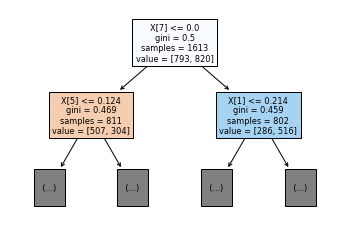

In [27]:
plot_tree(dt, max_depth=1, filled=True)
plt.savefig('C:/Users/USER/Desktop/tree.jpg')
plt.show()

In [28]:
rf_model = RandomForestClassifier(n_estimators=100, criterion="gini", max_features="sqrt", random_state=12)
rf_model.fit(x_train_l, y_train_l)
preds = rf_model.predict(x_test_l)
accuracy = accuracy_score(y_test_l, preds)
print(f'Accuracy of the Random Forest:{accuracy*100}')
print(confusion_matrix(y_test_l, preds))
print(classification_report(y_test_l, preds))

Accuracy of the Random Forest:79.95049504950495
[[160  44]
 [ 37 163]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       204
           1       0.79      0.81      0.80       200

    accuracy                           0.80       404
   macro avg       0.80      0.80      0.80       404
weighted avg       0.80      0.80      0.80       404



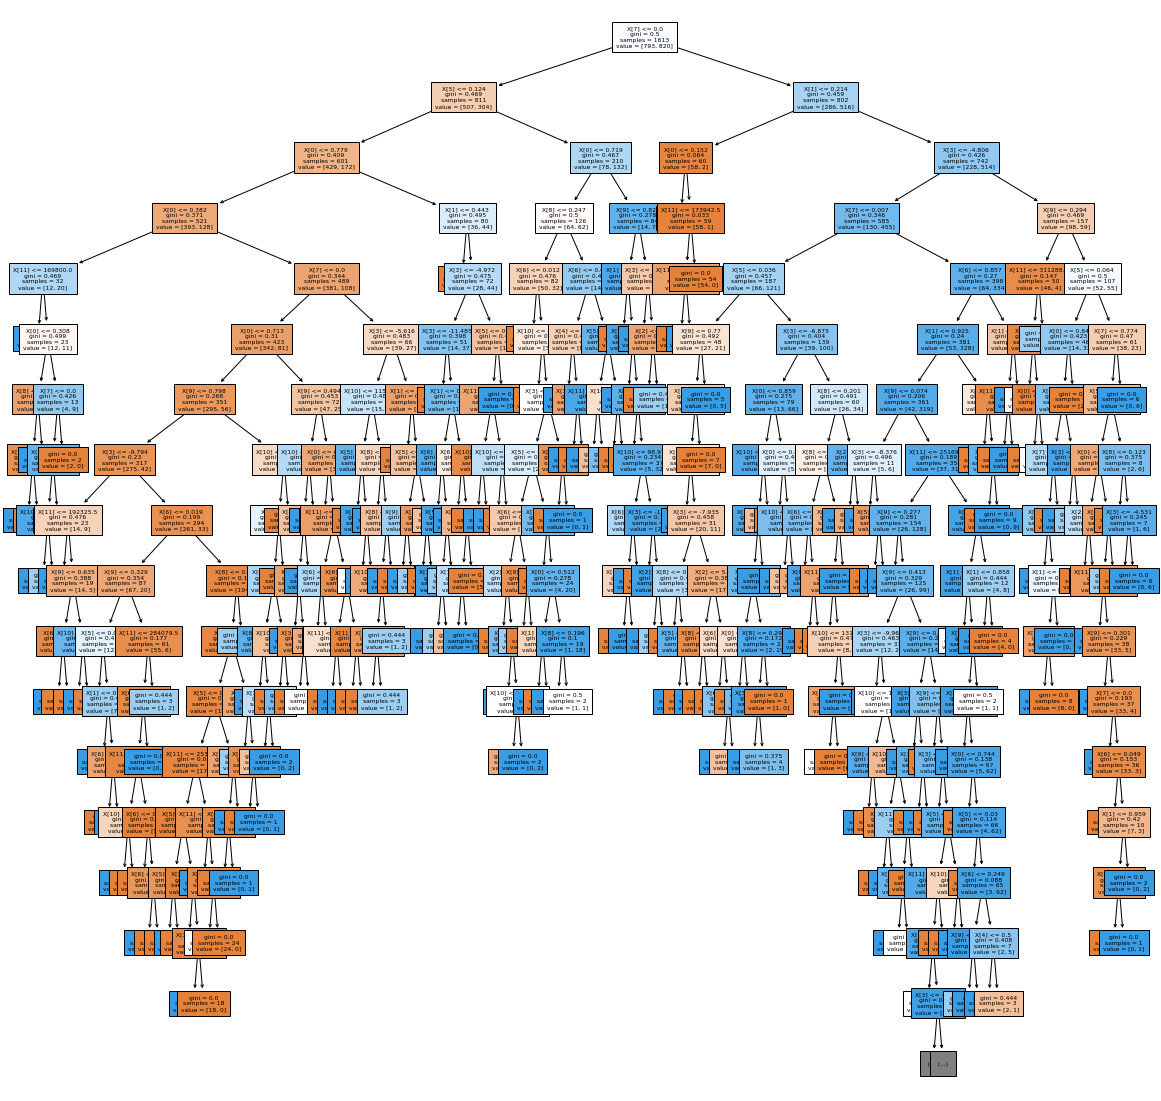

In [29]:
plt.figure(figsize=(20,20))
plot_tree(dt, max_depth=16, filled=True, fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)

In [30]:
nb = GaussianNB(priors = None, var_smoothing = 1e-09)
dt_nb = nb.fit(x_train_l, y_train_l)
score_nb = nb.score(x_test_l, y_test_l)
y_pred_l_nb = nb.predict(x_test_l)
accuracy_nb = accuracy_score(y_test_l, y_pred_l_nb)
print("Accuracy of the Naive_Bayes: ", accuracy_nb*100)
print(confusion_matrix(y_test_l, y_pred_l_nb))
print(classification_report(y_test_l, y_pred_l_nb))

Accuracy of the Naive_Bayes:  60.89108910891089
[[127  77]
 [ 81 119]]
              precision    recall  f1-score   support

           0       0.61      0.62      0.62       204
           1       0.61      0.59      0.60       200

    accuracy                           0.61       404
   macro avg       0.61      0.61      0.61       404
weighted avg       0.61      0.61      0.61       404



In [31]:
data_l[features+["target"]]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target
0,0.833,0.434,2,-8.795,1,0.4310,0.01020,0.021900,0.1650,0.286,150.062,204600,4.0,1
1,0.743,0.359,1,-10.401,1,0.0794,0.19900,0.006110,0.1370,0.588,160.083,326933,4.0,1
2,0.838,0.412,2,-7.148,1,0.2890,0.03440,0.000234,0.1590,0.173,75.044,185707,4.0,1
3,0.494,0.338,5,-15.236,1,0.0261,0.60400,0.510000,0.0922,0.230,86.468,199413,4.0,1
4,0.678,0.561,5,-11.648,0,0.0694,0.18000,0.512000,0.4390,0.904,174.004,392893,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.584,0.932,1,-3.501,1,0.3330,0.00106,0.002690,0.1290,0.211,74.976,274404,4.0,0
2013,0.894,0.892,1,-2.663,1,0.1310,0.08770,0.001670,0.0528,0.867,110.041,182182,4.0,0
2014,0.637,0.935,0,-2.467,1,0.1070,0.00857,0.003990,0.2140,0.470,150.082,207200,4.0,0
2015,0.557,0.992,1,-2.735,1,0.1330,0.00164,0.677000,0.0913,0.623,150.011,185600,4.0,0


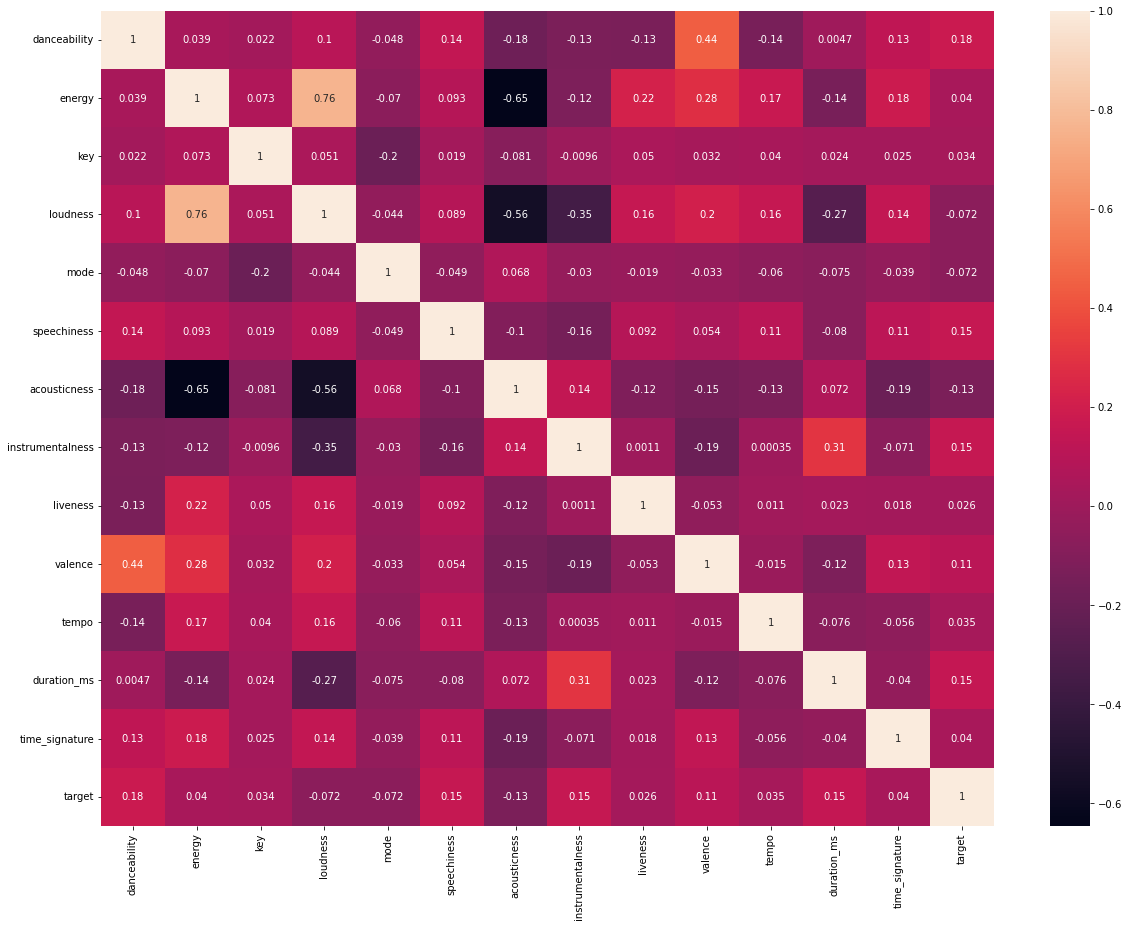

In [35]:
corr_matrix = data_l[features+["target"]].corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.savefig('C:/Users/USER/Desktop/features_corr.jpg')
plt.show()